In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np

In [2]:
X, y = make_blobs(n_samples=1000, centers=3, n_features=2, random_state=23)

In [3]:
X.shape

(1000, 2)

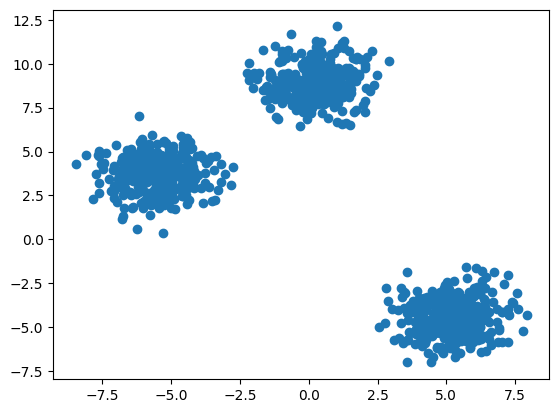

In [4]:
plt.scatter(X[:, 0], X[:, 1])

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [6]:
from sklearn.cluster import KMeans

In [7]:
# Manual process using Elbow method to select the value of k

wcss = []
for k in range(1, 11) :
    kmeans = KMeans(n_clusters=k, init='k-means++')
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)

In [8]:
wcss

[34827.57682552022,
 7935.4372861454185,
 1319.2730531585607,
 1140.4677884655127,
 1001.8997535386012,
 950.4343756904085,
 766.97339976396,
 672.0666024802189,
 637.690518292422,
 556.9938227182588]

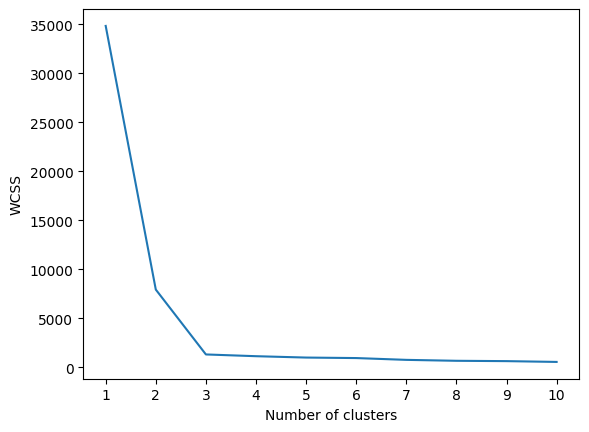

In [9]:
plt.plot(range(1, 11), wcss)
plt.xticks(range(1, 11))
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [10]:
kmeans = KMeans(n_clusters=3, init='k-means++')

In [11]:
y_labels = kmeans.fit_predict(X_train)

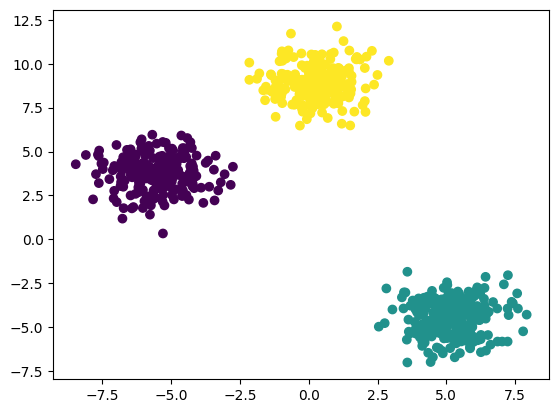

In [12]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_labels)

In [13]:
pip install kneed

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\Admin-\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [14]:
from kneed import KneeLocator

kl = KneeLocator(range(1, 11), wcss, curve='convex', direction='decreasing')
kl.elbow

np.int64(3)

In [15]:
from sklearn.metrics import silhouette_score

silhouette_coefficients = []
for k in range(2, 11) :
    kmeans = KMeans(n_clusters=k, init='k-means++')
    kmeans.fit(X_train)
    score = silhouette_score(X_train, kmeans.labels_)
    silhouette_coefficients.append(score)

In [16]:
silhouette_coefficients

[np.float64(0.7281443868598331),
 np.float64(0.8071181203797672),
 np.float64(0.6498155508951253),
 np.float64(0.6556839450260176),
 np.float64(0.33182622509079185),
 np.float64(0.3330257364460795),
 np.float64(0.3496610355321597),
 np.float64(0.33787742283871386),
 np.float64(0.340376951165924)]

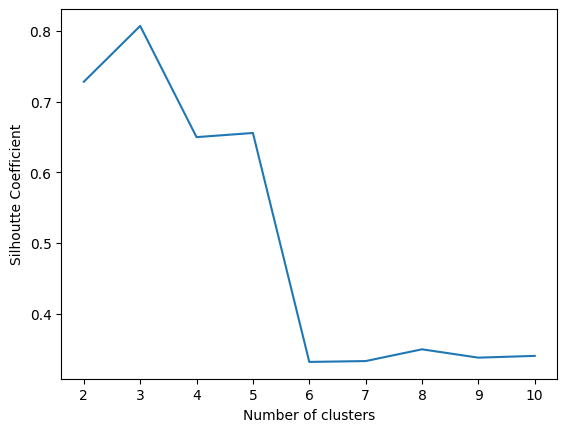

In [17]:
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of clusters")
plt.ylabel("Silhoutte Coefficient")
plt.show()